In [637]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import chain

# Question 1
You are starting your new role as Analyst for Zoey Bartlet’s 2016 campaign for US Senate in the state of New Hampshire in late 2015, one year before the election.  You should have received an attached questionnaire for a voter telephone survey commissioned by the Bartlet campaign.  There are approximately 5,000 responses, the data for which is provided to you in the attached Excel spreadsheet.  Zoey and her campaign manager have asked you to look over the questionnaire and the data and answer the following questions:

Part A
One staffer has looked over the survey responses and reported that Bartlet is ahead by 5 points in the race.  Is the staffer correct?  Why or why not?

In [633]:
q1=pd.read_csv('Q1 survey response data.csv')

In [634]:
q1.head()

,Individual ID,Age,Gender,Party Registration,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,1,86,F,D,1,4,3,1,2,2,2
1,2,68,F,D,2,1,1,1,1,3,3
2,3,58,F,D,1,1,1,1,1,2,1
3,4,73,M,D,1,2,3,4,2,2,1
4,5,50,F,D,1,1,2,2,1,2,1


In [536]:
print "Voter % for Bartlet vs Hoynes"
print Q3_hist[:2]/len(q1.index)
print "\n"
print "Voter % for Bartlet vs Hoynes (amongst Likely to Vote or greater)"
print q1[q1['Q1']<4].groupby(['Q3'])['Age'].count()[:2]/len(q1.index)

Voter % for Bartlet vs Hoynes
Q3
1    0.386464
2    0.342611
Name: Age, dtype: float64


Voter % for Bartlet vs Hoynes (amongst Likely to Vote or greater)
Q3
1    0.360833
2    0.321986
Name: Age, dtype: float64


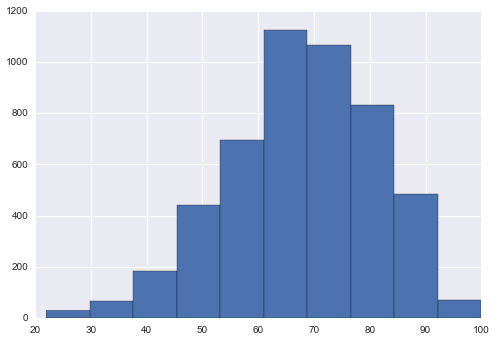

In [8]:
q1['Age'].hist()
plt.savefig('Q1_age_dist.png')

In [91]:
print "mean: {}".format(q1['Age'].mean())
print "median: {}".format(q1['Age'].median())

mean: 67.7276732078
median: 68.0


> A telephone survey should only reach people at their home phone numbers on land lines that happen to be at home  most likely during business hours. These targeted participants are more likely to be older, maybe be stay-at-home adults, and have been situated in a domestic situation at their address. Most likely these targeted participants are part of households that are families. Due to the participants being older, they potentially lean more conservative and/or Republican (as shown below - in the party histogram).

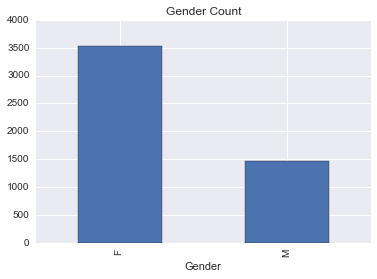

In [104]:
df_gender = q1.groupby(['Gender'])['Gender'].count()
df_gender.plot(kind='bar');
plt.title("Gender Count")
plt.savefig('Q1_gender_dist.png')

> The gender proportion is heavily female

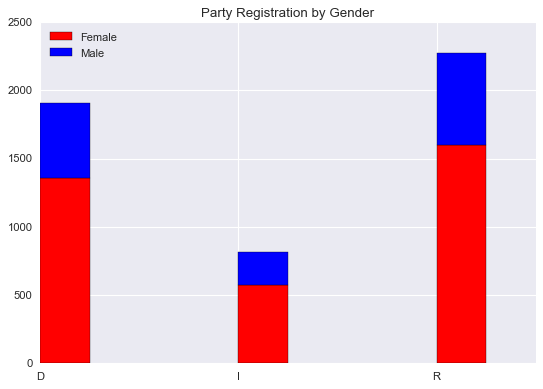

In [566]:
ind_party = q1.groupby(['Party Registration'])['Age'].count().index
party_F = q1[q1['Gender']=='F'].groupby(['Party Registration'])['Age'].count()
party_M = q1[q1['Gender']=='M'].groupby(['Party Registration'])['Age'].count()
fig_party_gender = plt.figure()
ax_party_gender = fig_party_gender.add_subplot(111)
ax_party_gender.bar(range(len(party_F)), party_F, width=barw, color='r', label='Female')
ax_party_gender.bar(range(len(party_F)), party_M, bottom=party_F, width=barw, color='b', label='Male')
plt.xticks(range(len(party_F)), party_F.index)
plt.legend(loc='upper left')
plt.title("Party Registration by Gender")
plt.savefig("Party Hist.png")

> Proportionally, Republicans have the largest percentage of males

In [645]:
#Party-Gender Proportions
norm_party_gender=party_gender/party_gender.sum().sum()
print norm_party_gender

Gender                     F         M
Party Registration                    
D                   0.271526  0.110933
I                   0.114137  0.048458
R                   0.319984  0.134962


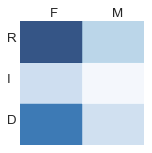

In [599]:
# Heatmap of Gender to Party Registration
fig_heat, ax_heat = plt.subplots()
heatmap = ax_heat.pcolor(party_gender, cmap=plt.cm.Blues, alpha=0.8)
# put the major ticks at the middle of each cell
#ax.set_yticks(np.arange(party_gender.shape[0]) + .5, minor=False)
#ax.set_xticks(np.arange(party_gender.shape[1]) + .5, minor=False)
#ax_heat.invert_yaxis()
# set the x-axis labels on the top
#ax_heat.xaxis.tick_top()
#ax_heat.set_xticklabels(party_gender.columns, ha='center', size=10, weight=10, minor=False)
#ax_heat.set_yticklabels(party_gender.index, va='center', size=10, weight=10, minor=False)
# rotate the x-axis labels
#plt.xticks(rotation=90)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
ax_heat.get_xaxis().set_visible(False)
ax_heat.get_yaxis().set_visible(False)
plt.text(0.5,3.1,'F')
plt.text(1.5,3.1,'M')
plt.text(-0.2,2.5,'R')
plt.text(-0.2,1.5,'I')
plt.text(-0.2,0.5,'D')
# Format
fig_heat = plt.gcf()
fig_heat.set_size_inches(2, 2)

> In terms of Party Registration, the survey population reflects NH’s overall voting breakdown by having a strong independent streak and leaning Republican. 

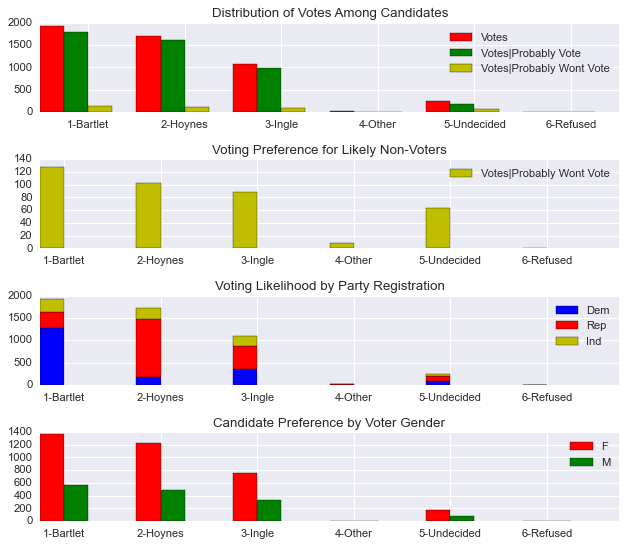

In [570]:
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 80})
Q3_hist = q1.groupby(['Q3'])['Age'].count()
Q3_count = np.asarray(q1.groupby(['Q3'])['Age'].count())
options = ['1-Bartlet','2-Hoynes','3-Ingle','4-Other','5-Undecided','6-Refused']
ind = Q3_hist.index[:-1]
width = 0.5
barw = 0.25
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(411)
votes1 = ax1.bar(ind, q1.groupby(['Q3'])['Age'].count()[:-1], barw, color='r')
votes2 = ax1.bar(ind+barw , q1[q1['Q1']<4].groupby(['Q3'])['Age'].count()[:-1], barw , color='g')
votes3 = ax1.bar(ind+(barw*2), q1[q1['Q1']>3].groupby(['Q3'])['Age'].count()[:-1], barw , color='y')
plt.title('Distribution of Votes Among Candidates')
ax1.legend((votes1[0], votes2[0],votes3[0]), ('Votes', 'Votes|Probably Vote','Votes|Probably Wont Vote'))
plt.xticks(ind+width, options)
ax2 = fig.add_subplot(412)
ax2.bar(ind, q1[q1['Q1']>3].groupby(['Q3'])['Age'].count()[:-1], barw , color='y')
plt.title("Voting Preference for Likely Non-Voters")
ax2.legend(['Votes|Probably Wont Vote'])
plt.xticks(ind+barw, options)
ax3 = fig.add_subplot(413)
Q1_party = pd.crosstab(q1['Party Registration'],q1['Q3'], colnames=["Voting Likelihood"])
ind_3 = np.array(Q1_party.columns)[:-1]
dem = np.array(Q1_party.iloc[0,:-1])
indpnt = np.array(Q1_party.iloc[1,:-1])
rep = np.array(Q1_party.iloc[2,:-1])
dems = ax3.bar(ind_3, dem, width=barw , color='b', label='Dem')
reps = ax3.bar(ind_3, rep, bottom=dem, width=barw, color='r',label='Rep')
inds = ax3.bar(ind_3, indpnt, bottom=rep+dem, width=barw, color='y',label='Ind')
plt.title("Voting Likelihood by Party Registration")
plt.xticks(ind_3+barw, options)
plt.legend(loc='upper right')
ax3.legend()
ax4 = fig.add_subplot(414)
q3_F = ax4.bar(ind, q1[q1['Gender']=='F'].groupby(['Q3'])['Age'].count()[:-1], barw, color='r', label='F')
q3_M = ax4.bar(ind+barw, q1[q1['Gender']=='M'].groupby(['Q3'])['Age'].count(), barw , color='g',label='M')
plt.title("Candidate Preference by Voter Gender")
plt.legend(loc='upper right')
plt.xticks(ind+barw, options)
plt.tight_layout()

> Perhaps the high proportion of female survey respondents is providing more of a bias for Bartlet amongst Republicans and Independents. If the general population is weighted more evenly between genders, the gap might be closer between Bartlet and Hoynes

In [537]:
#Correlation between Obama/Romney/Other and Bartlet/Hoynes/Other
Q4 = q1['Q4'].replace([3,4,5],np.repeat(3,3))
Q6 = q1['Q6'].replace([3,4,5],np.repeat(3,3))
corr_Q4_Q6 = pd.concat([Q4,Q6],axis=1)
corr_Q4_Q6.corr()

,Q4,Q6
Q4,1.000000,0.270127
Q6,0.270127,1.000000


> There is little correlation between whether voters voted for Obama/Romney in 2012 and whether they will vote for Bartlet/Hoynes respectively. NH does not appear to vote straight down party lines

In [542]:
#Party Registration and Governor Approval Proportions
pd.crosstab(q1['Party Registration'],q1['Q5'], colnames=["Governor Approval"])/len(q1.index)

Governor Approval,0,1,2,3,4,5,6
Party Registration,,,,,,,
D,0.0002,0.282539,0.087705,0.011614,0.000200,0.0000,0.0002
I,0.0000,0.071286,0.085102,0.006207,0.000000,0.0000,0.0000
R,0.0004,0.107729,0.330396,0.015419,0.000601,0.0004,0.0000


In [642]:
#Party Registration and Political Views Proportions
pd.crosstab(q1['Party Registration'],q1['Q7'], colnames=["Political Views"])/len(q1.index)

Political Views,1,2,3,4,5,6,8
Party Registration,,,,,,,
D,0.267922,0.014818,0.094714,0.004405,0.0000,0.0004,0.0002
I,0.014818,0.019824,0.123148,0.004806,0.0000,0.0000,0.0000
R,0.021826,0.304966,0.123949,0.003805,0.0002,0.0002,0.0000


The staffer is not correct (also not incorrect) for the following reasons:

> A telephone survey should only reach people at their home phone numbers on land lines that happen to be at home during what are most likely business hours. These targeted participants are older as seen in the age distribution histograms, they are mostly female and most likely in family households. 

> One benefit is that the survey was fairly large with 5000 respondents. However, the mostly female weighted respondents may add bias for a female candidate. In terms of party registration, the breakdown of the respondents seems to be fairly reflective of the NH voting population: mostly Republican with a significant Independent streak. 

> Interestingly Independents mostly view themselves as "moderate" in their political views. 

> In terms of poll respondents Bartlet to Hoynes is 39% to 34%, however when you take into account those who are LIKELY to vote, that margin shrinks to 4% (36% to 32%). On the other hand, younger voters, who were not represented in this survey, may be more likely to vote Democratic fo Bartlet; however the effect may be reduced with more male voters who may not be as biased for a female candidate as female voters.

# Question 2
What is the effect of the independent candidate Jessica Ingle on this race?  Is she drawing more support away from Bartlet or from Hoynes?  Why do you say that?

Q4
1    2389
2    2208
3      36
4     355
5       5
9       1
Name: Age, dtype: int64


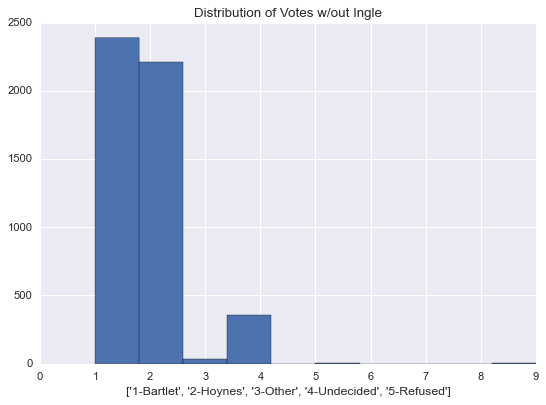

In [575]:
#Candidate votes if Ingle dropout
q1['Q4'].hist()
Q4_count = np.asarray(q1.groupby(['Q4'])['Age'].count())
print q1.groupby(['Q4'])['Age'].count()
plt.title('Distribution of Votes w/out Ingle')
plt.xlabel(['1-Bartlet','2-Hoynes','3-Other','4-Undecided','5-Refused'])
plt.savefig('Q1_q4.png')

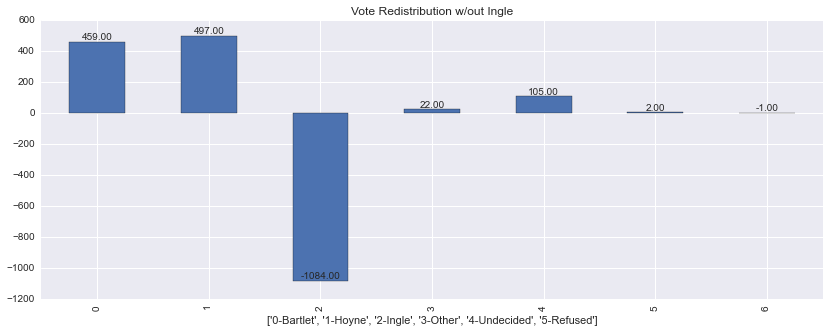

In [132]:
Q4_count = np.insert(Q4_count,2,0,axis=0) #inserting Ingle to match np arrays
plt.figure(figsize=(14,5))
pd.Series(Q4_count - Q3_count).plot(kind='bar')
plt.title("Vote Redistribution w/out Ingle")
for x,y in enumerate(Q4_count - Q3_count):
    plt.text(x,y + 0.05, '%.2f' % y, ha='center', va='bottom')
plt.xlabel(['0-Bartlet','1-Hoynes','2-Ingle','3-Other','4-Undecided','5-Refused']);

In [515]:
pd.concat([pd.get_dummies(q1['Q3']),pd.get_dummies(q1['Q4'])],axis=1).corr().iloc[:7,-6:]

,1,2,3,4,5,9
1,0.774430,-0.664322,-0.057907,-0.198748,-0.025125,-0.011232
2,-0.651645,0.758252,-0.056528,-0.178361,-0.009513,-0.010217
3,-0.115282,-0.032539,0.047001,0.270199,0.014049,-0.007452
4,-0.028031,-0.016699,0.129785,0.044285,-0.001679,-0.000750
5,-0.083810,-0.097128,0.121545,0.308128,0.021767,-0.003249
6,-0.007119,-0.021826,0.094514,0.025021,-0.000776,-0.000347
9,-0.019168,-0.017819,-0.001706,-0.005537,0.315816,0.707036


In [723]:
#Bartlet preferring voters
Q2_Q3_Bartlet = np.array(q1['Q3']==1) #voters for Bartlet in Q3
print "Q3 Bartlet voters: {}".format(np.sum(Q2_Q3_Bartlet))
Q2_Q4_Bartlet = np.array(q1['Q4']==1) #voters for Barlet in Q4
print "Q4 Bartlet voters: {}".format(np.sum(Q2_Q4_Bartlet))
print "Loyal Bartlet voters: {}".format(np.sum(Q2_Q3_Bartlet*Q2_Q4_Bartlet)) #voters for Barlet in Q3 AND Q4)
print "Ingle-dropout Bartlet defectors: {}".format(np.sum(Q2_Q3_Bartlet*Q2_Q4_Bartlet) - np.sum(Q2_Q3_Bartlet))

Q3 Bartlet voters: 1930
Q4 Bartlet voters: 2389
Loyal Bartlet voters: 1864
Ingle-dropout Bartlet defectors: -66


In [724]:
#Hoynes preferring voters
Q2_Q3_Hoynes = np.array(q1['Q3']==2) #voters for Hoyne in Q3
print "Q3 Hoynes voters: {}".format(np.sum(Q2_Q3_Hoynes))
Q2_Q4_Hoynes = np.array(q1['Q4']==2) #voters for Hoyne in Q4
print "Q4 Hoynes voters: {}".format(np.sum(Q2_Q4_Hoynes))
print "Loyal Hoynes voters: {}".format(np.sum(Q2_Q3_Hoynes*Q2_Q4_Hoynes)) #voters for Hoyne in Q3 AND Q4
print "Ingle-dropout Hoynes defectors: {}".format(np.sum(Q2_Q3_Hoynes*Q2_Q4_Hoynes) - np.sum(Q2_Q3_Hoynes))

Q3 Hoynes voters: 1711
Q4 Hoynes voters: 2208
Loyal Hoynes voters: 1649
Ingle-dropout Hoynes defectors: -62


In [725]:
#Defectors
print "Bartlet-to-Hoynes on Ingle dropout: {}".format(np.sum(Q2_Q3_Bartlet*Q2_Q4_Hoynes))
print "Hoynes-to-Bartlet on Ingle dropout: {}".format(np.sum(Q2_Q3_Hoynes*Q2_Q4_Bartlet))

Bartlet-to-Hoynes on Ingle dropout: 51
Hoynes-to-Bartlet on Ingle dropout: 47


In [728]:
#Q4 Undecided voters
Q2_Q3_undecided = np.array(q1['Q3']==5) #voters for undecided in Q3
print "Q3 Undecided voters: {}".format(np.sum(Q2_Q3_undecided))
Q2_Q4_undecided = np.array(q1['Q4']==4) #voters for undecided in Q4
print "Q4 Undecided voters: {}".format(np.sum(Q2_Q4_undecided))
print "Undecided to Bartlet: {}".format(np.sum(Q2_Q3_undecided*Q2_Q4_Bartlet))
print "Undecided to Hoynes: {}".format(np.sum(Q2_Q3_undecided*Q2_Q4_Hoynes))
print "Bartlet-to-undecided on Ingle dropout: {}".format(np.sum(Q2_Q3_Bartlet*Q2_Q4_undecided)) #voters for Bartlet in Q3 AND undecided in Q4
print "Hoynes-to-undecided on Ingle dropout: {}".format(np.sum(Q2_Q3_Hoynes*Q2_Q4_undecided)) #voters for Hoynes in Q3 AND undecided in Q4

Q3 Undecided voters: 250
Q4 Undecided voters: 355
Undecided to Bartlet: 74
Undecided to Hoynes: 58
Bartlet-to-undecided on Ingle dropout: 13
Hoynes-to-undecided on Ingle dropout: 13


>- Overall slightly more votes go to the Republican candidate Hoynes if Ingle drops out. 
>- Undecided received a large bump from Ingle voters with an even number of defectors from the Bartlet and Hoynes camp.
>- Interestingly a larger number of Undecided switch to the Bartlet camp if Ingle drops out
>- Also, Bartlet and Hoynes voters switch evenly (about 1% of survey respondents) if Ingle drops out (why?.. see below)

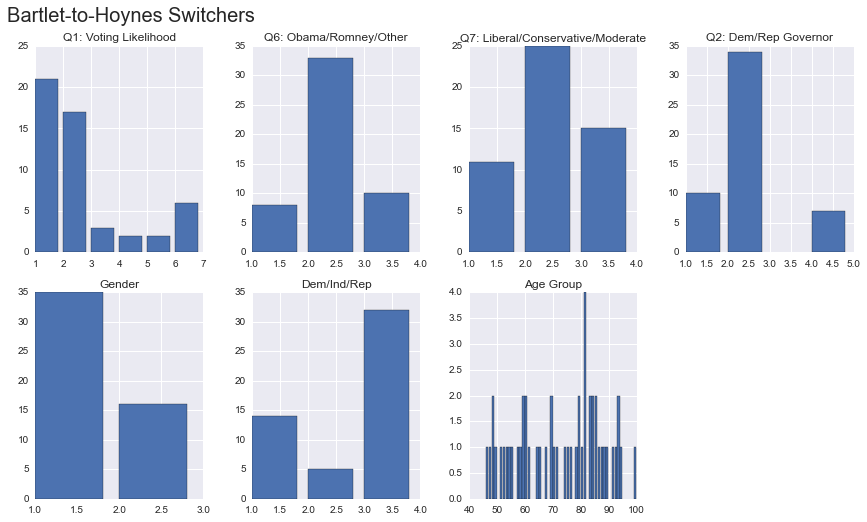

In [714]:
fig_B2H = plt.figure(figsize=(12,7))
fig_B2H.text(0,1,"Bartlet-to-Hoynes Switchers", size=20)
ax_B2H_Q1 = fig_B2H.add_subplot(241)
Q1_B2H = q1[Q2_Q3_Bartlet*Q2_Q4_Hoynes].groupby('Q1')['Q1'].count()
ax_B2H_Q1.bar(Q1_B2H.index,Q1_B2H,width=0.8)
ax_B2H_Q1.set_title("Q1: Voting Likelihood")
ax_B2H_Q6 = fig_B2H.add_subplot(242)
Q6_B2H = q1[Q2_Q3_Bartlet*Q2_Q4_Hoynes].groupby('Q6')['Q6'].count()
ax_B2H_Q6.bar(Q6_B2H.index,Q6_B2H,width=0.8)
ax_B2H_Q6.set_title("Q6: Obama/Romney/Other")
ax_B2H_Q7 = fig_B2H.add_subplot(243)
Q7_B2H = q1[Q2_Q3_Bartlet*Q2_Q4_Hoynes].groupby('Q7')['Q7'].count()
ax_B2H_Q7.bar(Q7_B2H.index,Q7_B2H,width=0.8)
ax_B2H_Q7.set_title("Q7: Liberal/Conservative/Moderate")
ax_B2H_Q2 = fig_B2H.add_subplot(244)
Q2_B2H = q1[Q2_Q3_Bartlet*Q2_Q4_Hoynes].groupby('Q2')['Q2'].count()
ax_B2H_Q2.bar(Q2_B2H.index,Q2_B2H,width=0.8)
ax_B2H_Q2.set_title("Q2: Dem/Rep Governor")
ax_B2H_G = fig_B2H.add_subplot(245)
G_B2H = q1[Q2_Q3_Bartlet*Q2_Q4_Hoynes].groupby('Gender')['Gender'].count()
ax_B2H_G.bar(range(1,len(G_B2H.index)+1),G_B2H,width=0.8)
ax_B2H_G.set_title("Gender")
ax_B2H_party = fig_B2H.add_subplot(246)
P_B2H = q1[Q2_Q3_Bartlet*Q2_Q4_Hoynes].groupby('Party Registration')['Party Registration'].count()
ax_B2H_party.bar(range(1,len(P_B2H.index)+1),P_B2H,width=0.8)
ax_B2H_party.set_title("Dem/Ind/Rep")
ax_B2H_age = fig_B2H.add_subplot(247)
Age_B2H = q1[Q2_Q3_Bartlet*Q2_Q4_Hoynes].groupby('Age')['Gender'].count()
ax_B2H_age.bar(Age_B2H.index,Age_B2H,width=0.8)
ax_B2H_age.set_title("Age Group")
plt.tight_layout()

> The Bartlet to Hoynes switchers are largely Republican, self-identified as conservative and evenly spread between 50-100

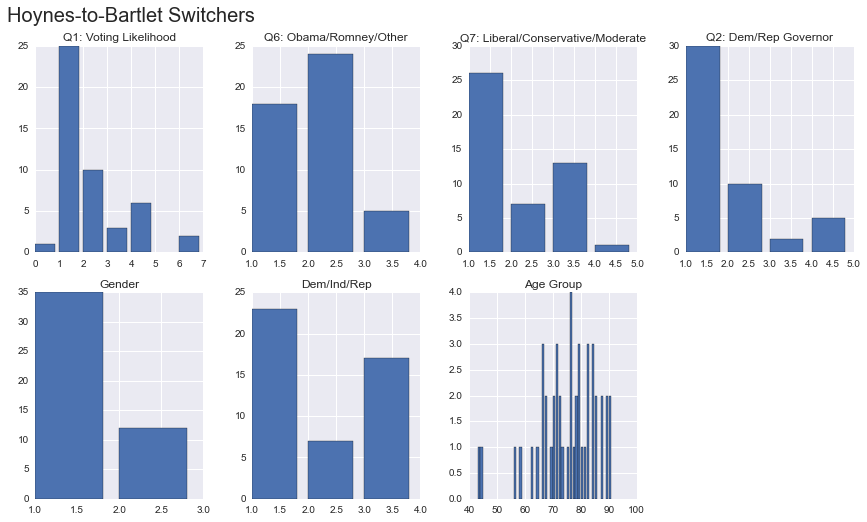

In [717]:
fig_H2B = plt.figure(figsize=(12,7))
fig_H2B.text(0,1,"Hoynes-to-Bartlet Switchers", size=20)
ax_H2B_Q1 = fig_H2B.add_subplot(241)
Q1_H2B = q1[Q2_Q3_Hoynes*Q2_Q4_Bartlet].groupby('Q1')['Q1'].count()
ax_H2B_Q1.bar(Q1_H2B.index,Q1_H2B,width=0.8)
ax_H2B_Q1.set_title("Q1: Voting Likelihood")
ax_H2B_Q6 = fig_H2B.add_subplot(242)
Q6_H2B = q1[Q2_Q3_Hoynes*Q2_Q4_Bartlet].groupby('Q6')['Q6'].count()
ax_H2B_Q6.bar(Q6_H2B.index,Q6_H2B,width=0.8)
ax_H2B_Q6.set_title("Q6: Obama/Romney/Other")
ax_H2B_Q7 = fig_H2B.add_subplot(243)
Q7_H2B = q1[Q2_Q3_Hoynes*Q2_Q4_Bartlet].groupby('Q7')['Q7'].count()
ax_H2B_Q7.bar(Q7_H2B.index,Q7_H2B,width=0.8)
ax_H2B_Q7.set_title("Q7: Liberal/Conservative/Moderate")
ax_H2B_Q2 = fig_H2B.add_subplot(244)
Q2_H2B = q1[Q2_Q3_Hoynes*Q2_Q4_Bartlet].groupby('Q2')['Q2'].count()
ax_H2B_Q2.bar(Q2_H2B.index,Q2_H2B,width=0.8)
ax_H2B_Q2.set_title("Q2: Dem/Rep Governor")
ax_H2B_G = fig_H2B.add_subplot(245)
G_H2B = q1[Q2_Q3_Hoynes*Q2_Q4_Bartlet].groupby('Gender')['Gender'].count()
ax_H2B_G.bar(range(1,len(G_H2B.index)+1),G_H2B,width=0.8)
ax_H2B_G.set_title("Gender")
ax_H2B_party = fig_H2B.add_subplot(246)
P_H2B = q1[Q2_Q3_Hoynes*Q2_Q4_Bartlet].groupby('Party Registration')['Party Registration'].count()
ax_H2B_party.bar(range(1,len(P_H2B.index)+1),P_H2B,width=0.8)
ax_H2B_party.set_title("Dem/Ind/Rep")
ax_H2B_age = fig_H2B.add_subplot(247)
Age_H2B = q1[Q2_Q3_Hoynes*Q2_Q4_Bartlet].groupby('Age')['Gender'].count()
ax_H2B_age.bar(Age_H2B.index,Age_H2B,width=0.8)
ax_H2B_age.set_title("Age Group")
plt.tight_layout()

> The Hoynes to Bartlet switchers are mostly liberal/Dem with a smaller margin between Dem-Rep. A large portion voted for Romney in 2012. The ages are mostly clustered around 70-90

# Checking Validity of Survey Results

How would you confirm the accuracy of the attached polling results using only the data on this spreadsheet?  What checks would you run on the data to see if the responses in general seemed valid?

> I would confirm the accuracy by seeing whether sets of answers correspond. For instance if the people who answered  ‘Approve’ for Q5 are also ‘1’ for Q2, then I would consider the test valid. Some possible checks are listed:
-	Party registration and answers to Q7 *[liberal-Democrat shows correlation 0.68 and conservative-Republican shows correlation 0.63]*
-	Same count: Q2 – ‘1’ and Q5 – ‘Approve’ *[correlation plots show .68]*
-	Correlation across Other/Refused voters *[voters who are not participating]*
-	Count: Q4 – ‘1’ > Q3 – ‘1’ & Q4 – ‘2’ > Q3 – ‘2’ *[VERIFIED]*

In [641]:
#Correlation between self-identified political views and Party Registration
pd.concat([pd.get_dummies(q1['Q7']),pd.get_dummies(q1['Party Registration'])],axis=1).corr().iloc[:7,-3:]

,D,I,R
1,0.677080,-0.204352,-0.509368
2,-0.499966,-0.202548,0.638028
3,-0.156238,0.386075,-0.133604
4,-0.010396,0.064307,-0.037506
5,-0.011137,-0.006236,0.015490
6,0.014338,-0.010803,-0.005988
8,0.017983,-0.006236,-0.012929


> There is a medium-strong correlation between Democrat-"Liberal", Republican-"Conservative", and Independent-"Moderate" classification

In [644]:
#Party Registration and governor vote
pd.crosstab(q1['Party Registration'],q1['Q2'], colnames=["Governor Vote"])/len(q1.index)

Governor Vote,1,2,3,4,5,9
Party Registration,,,,,,
D,0.289748,0.065679,0.000601,0.026432,0.000000,0.0000
I,0.069283,0.071085,0.001001,0.021025,0.000000,0.0002
R,0.091710,0.310573,0.001602,0.050461,0.000601,0.0000


In [639]:
#Correlation between Approve/Disapprove/Other of governor and Donough/Stillman/Other
Q2 = q1['Q2'].replace([3,4,5],np.repeat(3,3))
corr_Q2_Q5 = pd.concat([Q2,q1['Q5']],axis=1)
corr_Q2_Q5.corr()

,Q2,Q5
Q2,1.000000,0.680394
Q5,0.680394,1.000000


> There is a correlation between a voter's approval of the current governor and whether s/he will vote for Donough

In [748]:
#Correlation between Other/Refused voters (not "Undecided" voters) across questions
Q1_other = q1['Q1'].isin([5,6])
Q2_other = q1['Q2'].isin([3,5])
Q3_other = q1['Q3'].isin([4,6])
Q4_other = q1['Q4'].isin([3,5])
Q5_other = q1['Q5'].isin([3])
Q6_other = q1['Q6'].isin([3,4,5])
Q7_other = q1['Q7'].isin([4])
pd.concat([Q1_other,Q2_other,Q3_other,Q4_other,Q5_other,Q6_other,Q7_other], axis=1).corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7
Q1,1.000000,0.036543,0.057412,0.048489,0.052025,0.092997,0.029854
Q2,0.036543,1.000000,-0.003612,0.138559,0.042973,0.020698,0.021600
Q3,0.057412,-0.003612,1.000000,0.147079,0.008341,0.005192,-0.006711
Q4,0.048489,0.138559,0.147079,1.000000,0.007887,0.044396,0.028710
Q5,0.052025,0.042973,0.008341,0.007887,1.000000,0.085300,0.126538
Q6,0.092997,0.020698,0.005192,0.044396,0.085300,1.000000,0.063008
Q7,0.029854,0.021600,-0.006711,0.028710,0.126538,0.063008,1.000000


> The strongest correlation is between Other/Refused voters for Bartlet vs. Hoynes (with and w/out Ingle in the race). The correlation factor is 0.14. The second strongest correlation is between Other/Refused voters for the governor spot and the Bartlet-Hoynes race w/out Ingle.

# Looking at Invalid Responses

There may be some scattered invalid responses in this data (such as 0, null, or other values not included in the survey script) due to errors on the part of the calling vendor.  How would you treat these invalid responses?  Do they threaten the integrity of the dataset? Why or why not?

In [635]:
q1.describe()

,Individual ID,Age,Q1,Q2,Q3,Q4,Q5,Q6,Q7
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,2497.500000,67.727673,1.592911,1.751502,1.991590,1.675410,1.574089,1.918302,2.067481
std,1441.787953,13.354100,1.142675,0.894003,1.046261,0.826756,0.570853,0.666299,0.844186
min,1.000000,22.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1249.250000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,2497.500000,68.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3745.750000,78.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000
max,4994.000000,100.000000,9.000000,9.000000,9.000000,9.000000,6.000000,9.000000,8.000000


In [636]:
invalid = list(chain(q1[(q1['Q1'].isin([0,9]))]['Individual ID'].values,
q1[(q1['Q2']>5)]['Individual ID'].values,
q1[(q1['Q3']>6)]['Individual ID'].values,
q1[(q1['Q4']>5)]['Individual ID'].values,
q1[(q1['Q5']>3)]['Individual ID'].values,
q1[(q1['Q6']>5)]['Individual ID'].values,
q1[(q1['Q7']>4)]['Individual ID'].values))
q1[q1['Individual ID'].isin(invalid)]

,Individual ID,Age,Gender,Party Registration,Q1,Q2,Q3,Q4,Q5,Q6,Q7
433,434,75,F,R,5,2,2,2,1,7,2
611,612,87,M,R,9,2,5,4,2,2,2
1109,1110,67,F,I,1,9,9,9,2,2,3
1190,1191,75,F,D,1,4,3,2,6,1,8
1771,1772,75,F,D,6,2,9,5,4,3,1
2624,2625,79,M,R,3,2,2,2,4,3,2
2664,2665,41,F,I,6,2,5,4,2,9,3
2670,2671,85,F,D,2,1,1,1,1,1,6
2769,2770,36,F,R,0,1,3,1,1,2,3
3956,3957,69,F,R,2,4,1,1,4,3,4


> None of the responses should be thrown out. The questions that truly provide value are Q3 and Q4. The individual 1110 does not have valid reponses for either; however the answers can be imputed from the information provided.

> Consider using NMF or kNN to fill in the responses after removing the invalid ones

# Question 4
You have recently started in the market research division of a box company in Tustin, CA. As one of your first tasks, Randy, the head of market research, asks you to analyze the following data from a recent poll of 5,000 Californians:

> If you were to purchase boxes in the next few months, would you prefer corrugated or uncorrugated cardboard for your boxes?

For your convenience, the individual-level responses from the poll are provided in “poll_responses.csv” which you should have received along with this exam (yes responses are coded as 1 and no responses as 0 in the file). The questions below can be answered with or without this additional data. 

## Part A. 
What is your best estimate for the percentage of Californians who prefer corrugated cardboard for their boxes? What is the 95% confidence interval for this estimate? Please show your work.


In [754]:
q4 = pd.read_csv("Q4 poll_responses.csv")
q4.head()

,gender,age_bucket,urbanicity,prefer_corrugated
0,male,18_to_35,urban,1
1,male,18_to_35,urban,1
2,male,18_to_35,urban,1
3,male,18_to_35,urban,1
4,male,18_to_35,urban,1


In [787]:
q4.info()
q4.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 5000
Data columns (total 4 columns):
gender               5001 non-null object
age_bucket           5001 non-null object
urbanicity           5001 non-null object
prefer_corrugated    5001 non-null int64
dtypes: int64(1), object(3)
memory usage: 195.4+ KB


,prefer_corrugated
count,5001.000000
mean,0.588482
std,0.492158
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [761]:
q4.groupby(['gender']).count()/len(q4.index)

,age_bucket,urbanicity,prefer_corrugated
gender,,,
female,0.507698,0.507698,0.507698
male,0.492302,0.492302,0.492302


> Male-to-Female ratio is accurately represented with respect to California

In [796]:
age_bucket = q4.groupby(['age_bucket']).count()/len(q4.index)
print age_bucket

              gender  urbanicity  prefer_corrugated
age_bucket                                         
18_to_35    0.194761    0.194761           0.194761
36_to_64    0.528694    0.528694           0.528694
65_plus     0.276545    0.276545           0.276545


> According to http://www.infoplease.com/us/census/data/california/demographic.html, the percentages are: 
- 18-35: 25% (34% normalized) (under-represented)
- 36-64: 37% (50% normalized) ((accurate relative proportion)
- 65+: 11% (16% normalized) (over-represented)

> For this dataset, the sampling weights should be:
- 18-35: 1.8
- 36-64: 1
- 65+: 0.6

In [893]:
w = pd.DataFrame(data=[1.8,1,0.6],index=age_bucket.index, columns = ['weights'])
w

,weights
age_bucket,
18_to_35,1.8
36_to_64,1.0
65_plus,0.6


In [894]:
urban_bucket = q4.groupby(['urbanicity']).count()/len(q4.index)
urban_bucket

,gender,age_bucket,prefer_corrugated
urbanicity,,,
rural,0.462907,0.462907,0.462907
urban,0.537093,0.537093,0.537093


> According to http://ruralhealth.stanford.edu/health-pros/factsheets/ the rural/urban breakdown is 13%/87%

> For this dataset the sampling weights are:
- rural: 0.3
- urban: 1.6

Use technique of __Weighting Adjustment__ when the survey sample is not representative of the population. 

In [895]:
w_urban = pd.DataFrame([0.3,1.6],urban_bucket.index, columns = ['weights'])
w = w.append(w_urban)
print w
print w.sum()

          weights
18_to_35      1.8
36_to_64      1.0
65_plus       0.6
rural         0.3
urban         1.6
weights    5.3
dtype: float64


In [896]:
perc = pd.crosstab(q4['age_bucket'], q4['urbanicity'])/len(q4.index)
perc

urbanicity,rural,urban
age_bucket,,
18_to_35,0.092382,0.102380
36_to_64,0.250350,0.278344
65_plus,0.120176,0.156369


In [897]:
m_corrugated = q4['prefer_corrugated'].mean()
print m_corrugated

0.588482303539


In [905]:
## Estimate of mean
mean_adj = m_corrugated*((perc.loc['18_to_35']['rural']*w.loc['rural']*w.loc['18_to_35'])+\
(perc.loc['36_to_64']['rural']*w.loc['rural']*w.loc['36_to_64'])+\
(perc.loc['65_plus']['rural']*w.loc['rural']*w.loc['65_plus'])+\
(perc.loc['18_to_35']['urban']*w.loc['urban']*w.loc['18_to_35'])+\
(perc.loc['36_to_64']['urban']*w.loc['urban']*w.loc['36_to_64'])+\
(perc.loc['65_plus']['urban']*w.loc['urban']*w.loc['65_plus']))
print "The percentage of people that prefer corrugated cardboard (the sample adjusted for the population) is: {}".format(mean_adj.values)

The percentage of people that prefer corrugated cardboard (the sample adjusted for the population) is: [ 0.6102212]


In [887]:
## 95% Confidence Interval 
q4['prefer_corrugated'].std()
se = np.sqrt(mean_adj*(1-mean_adj)/len(q4.index))
interval = se.iloc[0]*1.96
bottom = mean_adj.iloc[0]-interval
top = mean_adj.iloc[0]+interval
print "95% Confidence Interval is: ({},{})".format(bottom,top)

95% Confidence Interval is: (0.596704197321,0.623738202501)


# Part B.
Are men and women significantly different in their likelihood to prefer corrugated cardboard?

> You can run a test of difference in proportionality to determine whether they are significantly different
- H0: p_men = p_women
- Ha: p_men <> p_women

In [781]:
counts = np.array([sum(q4[q4['gender']=='male']['prefer_corrugated']),sum(q4[q4['gender']!='male']['prefer_corrugated'])])
nobs = np.array([sum(q4['gender']=='male'),sum(q4['gender']!='male')])

In [906]:
from statsmodels.stats.proportion import proportions_ztest
z, p = proportions_ztest(counts, nobs, value=0,alternative='two-sided')
print "p-value is: {}".format(p)

p-value is: 1.00794963669e-17


> There is a probability close to 1 that the difference in the proportion of men who prefer corrugated cardboard vs the proportion of women who prefer corrugated cardboard is non-random.

## Part C
Your company is currently planning for 54% of the boxes it makes next quarter to use corrugated cardboard. How (if at all) would you recommend adjusting production in the upcoming quarter based on the results of your analysis? Explain your reasoning.

> The proposal would be to increase the percentage of corrugated cardboard to 61% based on the fact that the rural and older population was largely over-represented in the survey. Also the 18-35 age group was under-represented in the survey. Given that it doesn't add marginal cost to increase the corrugated cardboard cost, the 61% target should be hit. If there were additional costs to changing production targets, the safest measure is to hit 60% as the lower range of the 95% conf interval. 